In [ ]:
#DESCRIPTION

#Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

#Problem Statement: 

#A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

#Domain: Amazon reviews for a leading phone brand

#Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

#Content: 

#Dataset: ‘K8 Reviews v0.2.csv’

#Columns:

#Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)

#Reviews: The main text of the review

#Steps to perform:

#Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.

#Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. Finally, give business-friendly names to the topics and make a table for business.

#Tasks: 

#Read the .csv file using Pandas. Take a look at the top few records.

#Normalize casings for the review text and extract the text into a list for easier manipulation.

#Tokenize the reviews using NLTKs word_tokenize function.

#Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

#For the topic model, we should  want to include only nouns.

#Find out all the POS tags that correspond to nouns.

#Limit the data to only terms with these tags.

#Lemmatize. 

#Different forms of the terms need to be treated as one.

#No need to provide POS tag to lemmatizer for now.

#Remove stopwords and punctuation (if there are any). 

#Create a topic model using LDA on the cleaned-up data with 12 topics.

#Print out the top terms for each topic.

#What is the coherence of the model with the c_v metric?

#Analyze the topics through the business lens.

#Determine which of the topics can be combined.

#Create topic model using LDA with what you think is the optimal number of topics

#What is the coherence of the model?

#The business should  be able to interpret the topics.

#Name each of the identified topics.

#Create a table with the topic name and the top 10 terms in each to present to the  business.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [135]:
#!pip install pyldavis
#!pip install spacy
#!pip install gensim

#loading and installing neccessary library and packages

     |████████████████████████████████| 1.6MB 2.6MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=6218842ec7483df6ffb42d4c053aab6ccb0a24528c609d1e3690bd7ec94db7a7
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [287]:
import pandas as pd
import numpy as np
from textblob import TextBlob 

import nltk
import string
import warnings
warnings.filterwarnings('ignore')
from nltk import tokenize,WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

from string import punctuation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
import re, nltk, spacy, gensim
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from pprint import pprint
from sklearn.model_selection import GridSearchCV
import nltk

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [288]:
#pip install --user -U nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

#Data Preprocessing
#With stopword and punctuation removal

In [289]:
stopwords1 = list(stopwords.words('english'))
print(stopwords1[0:11])
print('\nlength of stopwords list: ', len(stopwords1))
type(stopwords1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]

length of stopwords list:  179


list

In [290]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [291]:
stopwords1 = list(stopwords.words('english'))+list(punctuation)

In [292]:
print(len(stopwords1),stopwords1,sep='\n\n')

211

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'tha

In [293]:
#Read the .csv file using Pandas. Take a look at the top few records.
reviews = pd.read_csv('/content/drive/My Drive/K8 Reviews v0.2.csv')
reviews = reviews[:8000]
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [298]:
#checking for null values although it is not neccessary to do
print(reviews.isnull().sum(),reviews.shape,sep='\n\n')

sentiment    0
review       0
dtype: int64

(8000, 2)


In [299]:
reviews.dropna(inplace = True)

In [300]:
#checking the shape of the data
reviews.shape

(8000, 2)

In [301]:
reviews.sentiment.value_counts()

0    4209
1    3791
Name: sentiment, dtype: int64

In [302]:
#stemming and lemmatization
#here we have build a custom function that will first get the noun pos tag and then
#do the lemmatization

ps=PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [303]:
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    
    if nltk_tag.startswith('N'):
        return wordnet.NOUN
    else:          
        return None

def lemmatize_sentence(sentence):    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
#     print(list(nltk_tagged))
    
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

    
    lemmatized_sentence = []   
    
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
#             print('IN CASE OF NONE: ', lemmatized_sentence)
        
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
#             print('IN CASE OF ELSE : ',lemmatized_sentence)

    
    return " ".join(lemmatized_sentence)

# print(lemmatize_sentence(" i have been working on my skills ")) #I be love it





In [304]:
# Removing Stopwords and punctuatons
def clean_text(a):
    ls = [i.lower() for i in tokenize.word_tokenize(a) if i not in stopwords1]
    if len(ls)>3:
        val= ' '.join(ls)
        return val
    else :
        return None
    
    
# Lemmatization without POS Tags
def clean_text_lemma(a):
    val= ' '.join([lemmatizer.lemmatize(i.lower()) for i in tokenize.word_tokenize(a) if i not in stopwords1])
    return val


# Stemming
def clean_text_stem(a):    
    val= ' '.join([ps.stem(i.lower()) for i in tokenize.word_tokenize(a) if i not in stopwords1])
    return val

In [305]:
reviews['clean_txt'] = reviews['review'].apply(clean_text)
reviews.dropna(inplace = True)
len(reviews)

5827

In [306]:
reviews.head()

,sentiment,review,clean_txt
0,1,Good but need updates and improvements,good need updates improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile bought ever battery draining like...
2,1,when I will get my 10% cash back.... its alrea...,i get 10 cash back ... already 15 january..
4,0,The worst phone everThey have changed the last...,the worst phone everthey changed last phone pr...
5,0,Only I'm telling don't buyI'm totally disappoi...,only i 'm telling n't buyi 'm totally disappoi...


In [307]:
reviews['clean_lemma'] = reviews['clean_txt'].apply(clean_text_lemma)
reviews['clean_lemma_pos'] = reviews['clean_txt'].apply(lemmatize_sentence)
reviews['clean_stem_txt'] = reviews['clean_txt'].apply(clean_text_stem)

In [308]:
reviews.head()

,sentiment,review,clean_txt,clean_lemma,clean_lemma_pos,clean_stem_txt
0,1,Good but need updates and improvements,good need updates improvements,good need update improvement,good need update improvement,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile bought ever battery draining like...,worst mobile bought ever battery draining like...,worst mobile bought ever battery draining like...,worst mobil bought ever batteri drain like hel...
2,1,when I will get my 10% cash back.... its alrea...,i get 10 cash back ... already 15 january..,get 10 cash back ... already 15 january..,i get 10 cash back ... already 15 january..,get 10 cash back ... alreadi 15 january..
4,0,The worst phone everThey have changed the last...,the worst phone everthey changed last phone pr...,worst phone everthey changed last phone proble...,the worst phone everthey changed last phone pr...,worst phone everthey chang last phone problem ...
5,0,Only I'm telling don't buyI'm totally disappoi...,only i 'm telling n't buyi 'm totally disappoi...,'m telling n't buyi 'm totally disappointedpoo...,only i 'm telling n't buyi 'm totally disappoi...,'m tell n't buyi 'm total disappointedpoor bat...


In [309]:
#converting into list for better computation
data = reviews.clean_lemma_pos.values.tolist()

In [354]:
#checking the distribution of the frequent words
import matplotlib.pyplot as plt
from nltk import FreqDist
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(25,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

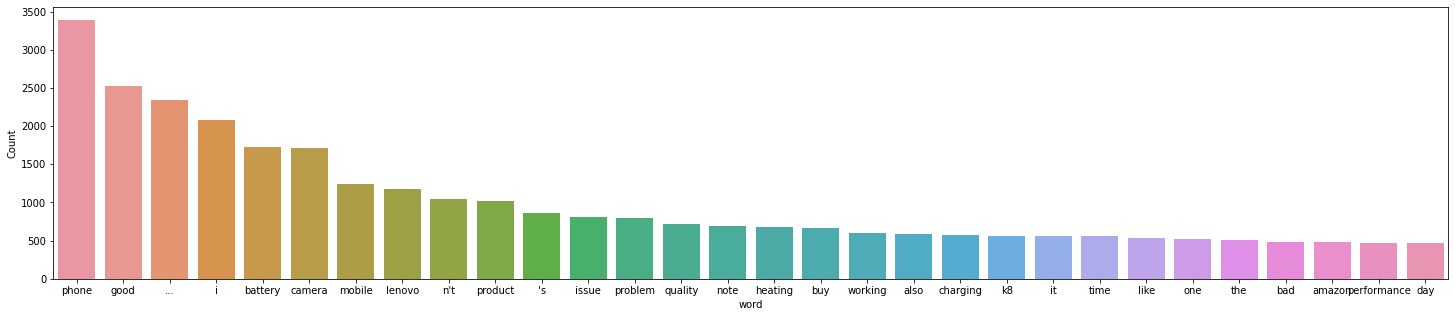

In [355]:
freq_words(reviews['clean_lemma_pos'])

In [310]:
#count vectorizer
#It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. 
#This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis)
                                                                                                              
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

In [356]:
data_vectorized = vectorizer.fit_transform(data)
type(data_vectorized)

scipy.sparse.csr.csr_matrix

In [312]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

In [313]:
# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  1.0751104804729859 %


In [ ]:
#LDA’s approach to topic modeling is to classify text in a document to a particular topic. Modeled as Dirichlet distributions, LDA builds −

#A topic per document model and
#Words per topic model

In [314]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=12,           # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

In [315]:
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=12, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [316]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -414579.66305578593
Perplexity:  413.92799356552376
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 12,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [317]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

In [318]:
# Init the Model
lda = LatentDirichletAllocation()

In [319]:
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

In [320]:
# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [321]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -90614.66296496465
Model Perplexity:  366.12561539068935


In [322]:
model.cv_results_['params'][0]

{'learning_decay': 0.5, 'n_components': 10}

In [323]:
model.cv_results_['params'], model.cv_results_['mean_test_score']

([{'learning_decay': 0.5, 'n_components': 10},
  {'learning_decay': 0.5, 'n_components': 15},
  {'learning_decay': 0.5, 'n_components': 20},
  {'learning_decay': 0.5, 'n_components': 25},
  {'learning_decay': 0.5, 'n_components': 30},
  {'learning_decay': 0.7, 'n_components': 10},
  {'learning_decay': 0.7, 'n_components': 15},
  {'learning_decay': 0.7, 'n_components': 20},
  {'learning_decay': 0.7, 'n_components': 25},
  {'learning_decay': 0.7, 'n_components': 30},
  {'learning_decay': 0.9, 'n_components': 10},
  {'learning_decay': 0.9, 'n_components': 15},
  {'learning_decay': 0.9, 'n_components': 20},
  {'learning_decay': 0.9, 'n_components': 25},
  {'learning_decay': 0.9, 'n_components': 30}],
 array([ -90614.66296496,  -93697.54661115,  -96303.55612368,
         -98741.80602119, -101229.7864391 ,  -90737.82543642,
         -93581.23602517,  -96589.71199452,  -98700.86624457,
        -100835.94516789,  -90740.04887767,  -93745.80818375,
         -96502.87469865,  -98973.91767886, -1

In [324]:
model.cv_results_['mean_test_score']

array([ -90614.66296496,  -93697.54661115,  -96303.55612368,
        -98741.80602119, -101229.7864391 ,  -90737.82543642,
        -93581.23602517,  -96589.71199452,  -98700.86624457,
       -100835.94516789,  -90740.04887767,  -93745.80818375,
        -96502.87469865,  -98973.91767886, -100832.71371895])

In [325]:
model.best_params_

{'learning_decay': 0.5, 'n_components': 10}

In [326]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

In [327]:
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
topicnames

['Topic0',
 'Topic1',
 'Topic2',
 'Topic3',
 'Topic4',
 'Topic5',
 'Topic6',
 'Topic7',
 'Topic8',
 'Topic9']

In [328]:
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

In [329]:
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
df_document_topic.head(5)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
Doc0,0.02,0.02,0.02,0.02,0.02,0.02,0.82,0.02,0.02,0.02
Doc1,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32
Doc2,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05
Doc3,0.01,0.01,0.20,0.01,0.01,0.01,0.01,0.01,0.01,0.73
Doc4,0.03,0.03,0.22,0.51,0.03,0.03,0.03,0.03,0.03,0.03


In [330]:
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.820000,0.020000,0.020000,0.020000,6
Doc1,0.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320000,0
Doc2,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,5
Doc3,0.010000,0.010000,0.200000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.730000,9
Doc4,0.030000,0.030000,0.220000,0.510000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,3
Doc5,0.190000,0.010000,0.010000,0.010000,0.300000,0.010000,0.010000,0.010000,0.440000,0.010000,8
Doc6,0.700000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0
Doc7,0.010000,0.010000,0.010000,0.220000,0.010000,0.010000,0.010000,0.010000,0.280000,0.460000,9
Doc8,0.010000,0.010000,0.010000,0.870000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,3
Doc9,0.010000,0.010000,0.350000,0.010000,0.220000,0.330000,0.010000,0.010000,0.010000,0.010000,2


In [331]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,4,1150
1,0,947
2,6,595
3,8,537
4,1,462
5,9,455
6,5,455
7,2,454
8,3,434
9,7,338


In [332]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  16.211204
6       0.648955  71.707100       2        1  13.411330
4      71.019684   9.971006       3        1  12.503739
9       3.785981  33.185135       4        1  11.327230
8     -42.666500  -9.222070       5        1  11.281865
7      -3.621689 -43.526516       6        1   8.699663
2      -3.632402  -4.171708       7        1   7.920677
5     -36.584400  35.804413       8        1   7.167679
3      44.391380  50.615383       9        1   6.002520
1      40.235809 -31.591665      10        1   5.474093, topic_info=           Term         Freq        Total Category  logprob  loglift
333        good  2642.000000  2642.000000  Default  30.0000  30.0000
517      mobile  1300.000000  1300.000000  Default  29.0000  29.0000
112      camera  1845.000000  1845.000000  Default  28.0000  28.0000
67      battery  1781.000000  1781.000000  Default  27.0000  27.0000
543        nice   486.000000   486.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
453        like    44.075586   533.735942  Topic10  -4.4479   0.4111
112      camera    66.143775  1845.435162  Topic10  -4.0420  -0.4235
266  experience    27.406896   185.997915  Topic10  -4.9230   0.9902
447      lenovo    40.828807  1248.927882  Topic10  -4.5245  -0.5155
549        note    30.530310   734.322839  Topic10  -4.8151  -0.2751

[591 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.729779    100
0         4  0.133793    100
0         5  0.072978    100
0         6  0.060815    100
5         1  0.150033    14k
...     ...       ...    ...
939       9  0.181715  worth
944       4  0.260771  wrost
944       9  0.738852  wrost
947       1  0.180705    yes
947       6  0.767998    yes

[1524 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 5, 10, 9, 8, 3, 6, 4, 2])

In [333]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index   = topicnames

# View
df_topic_keywords.head()

,100,1000,12000,13999,13mp,14k,15k,1st,2000,2017,2018,2nd,3gb,3rd,4000,4000mah,4gb,5mp,64gb,aap,able,absolutely,according,action,actually,add,added,affordable,ago,airtel,amazing,amazon,android,annoying,answer,apart,app,application,approx,apps,...,want,wanted,warm,warranty,waste,wasted,watch,watching,water,way,weak,week,weight,went,whatsapp,white,wifi,wise,wish,wonderful,wont,word,work,worked,working,works,worse,worst,worth,worthless,worthy,writing,wrong,wrost,x23,year,yes,yesterday,youtube,zero
Topic0,61.840087,0.100013,0.100012,0.100008,0.100002,3.687455,1.234250,0.100007,0.100026,2.995907,0.100008,0.100032,1.422084,1.162489,55.462698,64.365008,7.552752,0.106815,0.100009,0.100007,0.100021,3.615534,0.100013,0.176409,0.100056,0.100013,0.100098,0.100011,0.100013,0.100017,0.100009,0.100162,17.443902,1.538148,0.100017,0.100036,6.454253,10.719875,4.613545,25.629134,...,8.710792,2.465519,21.591024,0.100006,0.100012,0.100015,0.100006,18.099842,0.100011,12.739229,0.100005,16.443165,1.274727,0.100010,5.919955,0.100029,0.100081,5.112697,0.100030,0.100030,2.702622,3.034015,36.419210,4.294912,44.916758,2.045416,3.642677,89.302668,3.337076,0.344234,0.100013,5.938336,0.100021,0.100016,0.306847,0.100011,4.589215,0.100032,8.647518,0.100004
Topic1,0.100003,0.100021,0.100051,0.100000,0.100004,12.154314,0.100008,0.100000,0.100072,3.384224,0.100008,2.335768,0.100019,1.214770,0.100008,0.100004,0.100013,0.100004,0.100010,0.100000,0.100003,0.100002,0.100031,0.100034,0.239274,0.100000,0.100007,0.100019,0.100002,0.100000,19.564976,0.100022,11.842956,0.100009,0.100000,0.100006,11.615912,0.100018,0.100002,7.853015,...,0.100020,0.100003,0.100007,0.100009,0.529503,0.100003,0.100021,0.100002,0.100008,4.432380,0.100068,0.100013,6.954893,0.100006,0.209821,0.100008,0.100001,15.196861,0.100025,0.100016,0.100003,6.565411,7.680381,0.100000,58.779520,0.100009,1.488831,0.100066,0.100016,0.100016,0.100018,0.100003,0.100000,0.100001,0.100007,1.883421,0.234345,0.100007,0.100006,0.100000
Topic2,0.100006,0.100009,1.880827,0.100042,5.325077,0.100025,0.100000,0.100003,1.147278,2.188324,0.100003,0.100012,3.606575,4.976819,0.100009,1.834882,8.200336,28.093073,16.647935,0.100015,12.315424,0.100010,5.872006,0.100017,2.808186,0.100018,0.100010,0.100001,0.100008,1.430765,0.202399,123.031394,0.103543,3.147779,0.100111,0.100004,0.100015,34.260922,0.100012,0.100022,...,86.272832,0.100028,0.100053,0.100009,109.695056,15.909061,0.100009,0.100005,0.242761,4.512453,0.100022,0.100003,0.100018,3.704054,0.100007,0.100031,0.100307,5.067620,1.368801,0.100010,5.712515,0.100009,24.966261,3.796166,79.757786,0.100008,0.100053,195.970585,28.353540,2.760655,2.752079,0.100009,0.100009,0.100014,0.109612,2.840547,0.100009,9.187683,0.100016,0.100003
Topic3,0.100000,2.462933,0.100002,0.100038,0.100008,1.309040,8.965665,0.100005,7.914635,0.100006,0.100007,2.474342,0.100160,6.606933,0.100006,0.100010,0.100015,0.100005,0.100000,8.383011,0.117245,0.100004,9.526710,0.100001,0.109655,0.100023,0.100004,6.669937,0.100011,0.100004,8.321670,3.233487,0.100009,0.100005,0.100010,0.100009,0.100268,3.005199,1.595300,0.263410,...,0.100031,1.377583,0.100010,0.100006,42.615824,0.100006,9.140977,0.100008,4.006733,5.120846,0.100023,0.100121,0.100007,0.100005,0.100004,0.100000,3.773957,0.100013,3.981524,16.911712,1.021066,2.289834,2.663497,0.100046,3.465612,2.187102,0.100021,114.237324,28.258738,0.100018,4.363685,0.100041,0.100011,16.747542,0.100002,0.100032,0.100014,0.100016,0.100015,0.100014
Topic4,0.100007,5.609898,0.100021,7.659555,0.100038,0.100041,0.100015,0.100011,3.099904,0.100011,0.100002,0.100008,2.158553,0.100009,0.100012,0.100029,0.100015,0.100006,0.100021,0.100007,0.100008,0.100019,0.100011,0.100011,0.100008,0.100032,0.100000,4.336092,0.100009,0.100022,83.607368,0.432458,0.195128,2.969504,0.100000,14.621071,0.100022,7.300350,0.100012,3.320330,...,0.100010,0.100000,6.154754,0.100001,0.100004,0.100003,0.100000,0.100005,0.100011,0.227582,0.100006,7.152579,16.261319,0.100004,0.100010,3.426829,0.100011,0.100027,

In [334]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
        
    return topic_keywords

In [335]:
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

In [336]:
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,battery,charging,phone,charge,heating,time,fast,hour,issue,turbo,day,mobile,good,problem,backup
Topic 1,mobile,nice,good,phone,excellent,best,feature,dolby,killer,product,camera,performance,working,look,budget
Topic 2,camera,money,product,poor,phone,worst,quality,return,bad,buy,amazon,waste,value,want,battery
Topic 3,phone,buy,mobile,price,worst,product,range,hanging,earphone,dont,best,purchase,box,heating,problem
Topic 4,good,phone,camera,battery,heating,quality,product,awesome,price,performance,backup,nice,problem,issue,overall
Topic 5,product,bad,working,amazon,month,problem,hai,got,mobile,speaker,properly,phone,day,happy,glass
Topic 6,camera,good,phone,dual,quality,mode,depth,battery,better,rear,sound,music,performance,average,low
Topic 7,phone,screen,lenovo,feature,great,cast,note,price,android,stock,really,display,best,core,glass
Topic 8,lenovo,note,mobile,network,problem,phone,sim,working,option,time,signal,issue,jio,like,app
Topic 9,phone,lenovo,issue,service,amazon,buy,update,bought,customer,day,center,problem,worst,time,month


In [337]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))




Component's weights: 
 [[ 0.44  0.19  0.18  0.17  0.74  0.18  0.22  0.14  0.21  0.16]
 [ 0.75  0.04  0.08  0.06 -0.61  0.08  0.12  0.04  0.12  0.12]]
Perc of Variance Explained: 
 [0.06 0.19]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

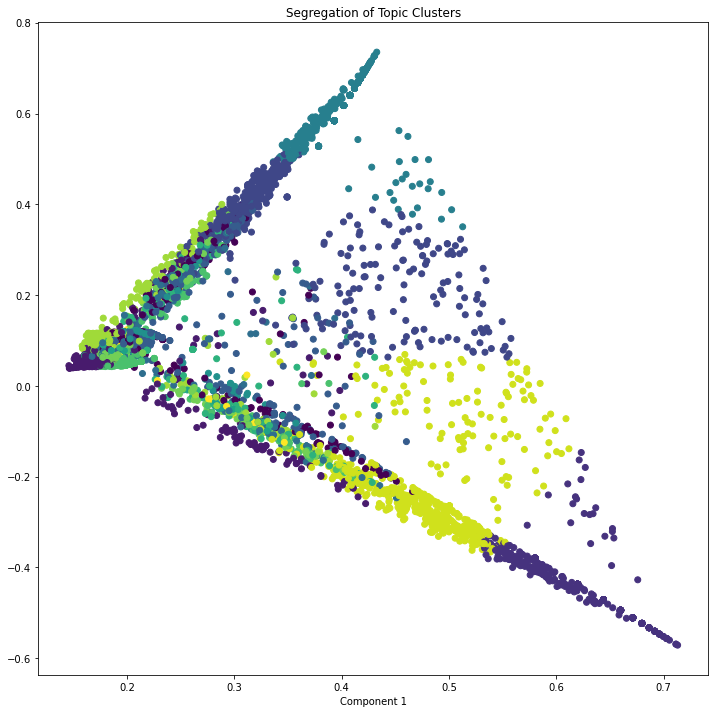

In [338]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

#these are the clusters that we acn group together.

In [ ]:
#here is another approach to apply lda model on the lemmatized data and get the coherence score for the LDA model

In [339]:
#using gensim simple preprocess funtion to clean the data
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['good', 'need', 'update', 'improvement']]


In [340]:
#converting the data into a list for better computation
data = reviews.clean_lemma_pos.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['good', 'need', 'update', 'improvement']


In [341]:
# Build the bigram and trigram models
bigram  = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod  = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [342]:
#user defined funtion for making the bigram trigram and lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [343]:
# Do lemmatization
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words)

print(data_lemmatized[:1])

[['good', 'need', 'update', 'improvement']]


In [344]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [345]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [346]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.056*"product" + 0.041*"amazon" + 0.034*"bad" + 0.033*"problem" + '
  '0.030*"return" + 0.028*"lenovo" + 0.028*"service" + 0.023*"mobile" + '
  '0.016*"buy" + 0.016*"purchase"'),
 (1,
  '0.109*"camera" + 0.088*"good" + 0.045*"battery" + 0.044*"quality" + '
  '0.040*"phone" + 0.018*"backup" + 0.016*"performance" + 0.016*"dual" + '
  '0.013*"poor" + 0.012*"sound"'),
 (2,
  '0.129*"good" + 0.085*"phone" + 0.051*"mobile" + 0.051*"product" + '
  '0.045*"very" + 0.045*"price" + 0.031*"-PRON-" + 0.026*"nice" + '
  '0.023*"money" + 0.023*"awesome"'),
 (3,
  '0.069*"phone" + 0.033*"issue" + 0.032*"get" + 0.028*"buy" + 0.028*"use" + '
  '0.027*"-PRON-" + 0.021*"do" + 0.019*"time" + 0.017*"update" + 0.016*"heat"'),
 (4,
  '0.045*"work" + 0.021*"phone" + 0.020*"screen" + 0.018*"-PRON-" + '
  '0.017*"properly" + 0.016*"gb" + 0.016*"speaker" + 0.015*"device" + '
  '0.014*"app" + 0.014*"sim"'),
 (5,
  '0.025*"photo" + 0.021*"ok" + 0.021*"notification" + 0.021*"no" + '
  '0.019*"always" + 0.0

In [347]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [348]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.49113291932882


In [349]:
#checking for optimal number of topics 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [350]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

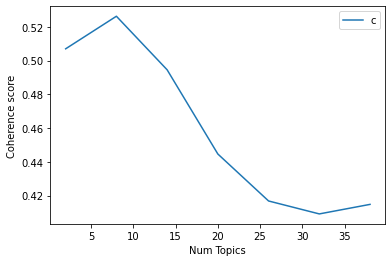

In [351]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [352]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    #we can observe that 8 is the number of topics for getting the optimal number of topics

Num Topics = 2  has Coherence Value of 0.507
Num Topics = 8  has Coherence Value of 0.5263
Num Topics = 14  has Coherence Value of 0.4945
Num Topics = 20  has Coherence Value of 0.4446
Num Topics = 26  has Coherence Value of 0.4168
Num Topics = 32  has Coherence Value of 0.4091
Num Topics = 38  has Coherence Value of 0.4147


In [353]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.034*"service" + 0.030*"amazon" + 0.028*"call" + 0.024*"hai" + '
  '0.017*"support" + 0.016*"product" + 0.016*"network" + 0.013*"replace" + '
  '0.013*"customer" + 0.012*"return"'),
 (1,
  '0.105*"camera" + 0.067*"good" + 0.042*"battery" + 0.040*"quality" + '
  '0.028*"phone" + 0.018*"performance" + 0.017*"dual" + 0.016*"low" + '
  '0.016*"poor" + 0.015*"backup"'),
 (2,
  '0.023*"money" + 0.022*"value" + 0.015*"jack" + 0.014*"wise" + '
  '0.013*"already" + 0.010*"anyone" + 0.010*"headphone" + 0.010*"nhi" + '
  '0.010*"ho" + 0.010*"bhi"'),
 (3,
  '0.065*"phone" + 0.051*"buy" + 0.037*"bad" + 0.031*"problem" + '
  '0.029*"product" + 0.028*"-PRON-" + 0.028*"issue" + 0.028*"mobile" + '
  '0.025*"do" + 0.024*"lenovo"'),
 (4,
  '0.032*"phone" + 0.023*"lenovo" + 0.022*"work" + 0.019*"note" + '
  '0.018*"-PRON-" + 0.018*"use" + 0.015*"get" + 0.014*"one" + 0.013*"month" + '
  '0.012*"app"'),
 (5,
  '0.138*"good" + 0.075*"phone" + 0.037*"price" + 0.030*"mobile" + '
  '0.030*"nice" + 0.02

In [ ]:
-------------------------End-----------------------------

In [ ]:
ford torino  buick skylark 320  amc rebel sst  amc rebel sst  plymouth satellite